<br><br><center><h1 style="font-size:2em;color:#2467C0">Project: Title</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/7/7b/Seattle_from_Kerry_Park_%281%29.jpg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This Notebook  contains the capstone project of the IBM Data Science Professional Certificate offer through Coursera. This submission corresponds to the whole project solution from defining the problem or task that is to be solved by  means of Foursquare location data and Machine Learning Algorithms. All the required tasks to accomplish the project goals are part of this final report. 
<br>
<br>
<br>
The data for this project is gathered from the web through a web scraping process using BeautifulSoup. Additional location data is gathered from Foursquare location service using their API.
<br>
<br>
<h1 style="font-size:1em;color:#2467C0">This Jupyter Notebook was created by: Gustavo Cedeño</h1>

</tr>
</table>

## Table of Contents
<ul>
    
<li><a href='#intro'>Introduction</a></li>
    <ul>
      <li><a href='#definition'>Problem or Idea Definition</a></li>
</ul>
    
    
<li><a href='#intro'>Project Description</a></li>
    <ul>
      <li><a href='#datasource'>DataSource</a></li>
      <li><a href='#requirements'> Required Libraries </a></li>
</ul>

<li><a href='#wrangling'>Data Wrangling</a></li>
    <ul>
      <li><a href='#gathering'>Gathering Data</a></li>
      <li><a href='#profil'>Data Profiling</a></li>
      <li><a href='#cleaning'>Assessing and Cleaning Data</a></li>
     
</ul>

<li><a href='#EDA'>Exploratory Data Analysis</a></li>
    <ul>
      <li><a href='#explore'>Exploring Data</a></li>
      <li><a href='#visuals'>Creating Visualizations</a></li>
      <li><a href='#p_insights'>Preliminary Insights</a></li>
          
</ul>

<li><a href='#method'>Methodology: Model and Predictive Data Analysis</a></li>
    <ul>
      <li><a href='#model'>Model Selection</a></li>
      <li><a href='#implementation'>Model Implementation</a></li>
      <li><a href='#evaluation'>Evaluating Model Performance</a></li>
  </ul>
   
<li><a href='#results'>Results</a></li>
    <ul>
      <li><a href='#discussion'>Discussion</a></li>
      <li><a href='#conclusion'>Conclusion</a></li>
    
</ul>
<li><a href='#reference'>References</a></li> 

<a id='intro'></a>
# Introduction

>This Notebook  contains the capstone project of the IBM Data Science Professional Certificate offer through Coursera. This submission corresponds to the whole project solution from defining the problem or task that is to be solved by  means of Foursquare location data and Machine Learning Algorithms. All the required tasks to accomplish the project goals are part of this final report. 

>
<a id='definition'></a>
## Problem or Idea Definition

> 

<a id='projectdetails'></a>
# Project Details
>Main tasks in this project are as follows:
>1. Gathering data
>2. Assessing and cleaning data
>3. Creating Visualizations
>4. Using the Foursquare API to gather venues information.
>5. Clustering.
>6. Results analysis and giving recommedations.

<a id='datasource'></a>
## Data Source
> 

<a id='requirements'></a>
## System and Libraries 

In [1]:
import numpy as np # library to handle data in a vectorized manner
# library for data analysis
import pandas as pd 
import pandas_profiling

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
#content extraction from a zip file 
import zipfile 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml
# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

import pickle

print('Libraries imported.\n')

print("System and libraries version:\n")
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import pandas; print("Pandas",pandas.__version__)

Libraries imported.

System and libraries version:

Windows-10-10.0.17134-SP0
Python 3.6.7 |Anaconda, Inc.| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
Scikit-Learn 0.20.2
NumPy 1.15.4
SciPy 1.1.0
Pandas 0.23.4


<a id='wrangling'></a>
# Data Wrangling
>>Data wrangling, which consists of the following tasks:
>1. Gathering data
>2. Assessing data
>3. Cleaning data
>4. Storing, analyzing, and visualizing the wrangled data

<a id='gathering'></a>
## Gathering Data
> 

In [4]:
with zipfile.ZipFile('seattle.zip','r') as seattle:
    seattle.extractall()

In [5]:
seattle_files = seattle.infolist()
seattle_files

[<ZipInfo filename='listings.csv' compress_type=deflate file_size=16871061 compress_size=3737330>,
 <ZipInfo filename='reviews.csv' compress_type=deflate file_size=36592035 compress_size=13135751>,
 <ZipInfo filename='calendar.csv' compress_type=deflate file_size=36650955 compress_size=3536858>]

In [6]:
df_list = pd.read_csv(seattle_files[0].filename)
df_list.head(3)

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   

                                      xl_picture_url   host_id  \
0                                                NaN    956883   
1  https://a0.muscache.com/ac/pictures/14409893/f...   5177328   
2                                                NaN  16708587   

                                     host_url host_name  host_since  \
0    https://www.airbnb.com/users/show/956883     Maija  2011-08-11   
1   https://www.airbnb.com/users/show/5177328    Andrea  2013-02-21   
2  https://www.airbnb.com/users/show/16708587      Jill  2014-06-12   

                        host_location  \
0  Seattle, Washington, United States   
1  Seattle, Washington, United States   
2  Seattle, Washington, United States   

                                          host_about  host_response_time  \
0  I am an artist, interior designer, and run a s...  within a few hours   
1  Living east coast/left coast/overseas.  Time i...      within an hour   
2  i love living in Seattle.  i grew up in the mi...  within a few hours   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                96%                 100%                 f   
1                98%                 100%                 t   
2                67%                 100%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/ac/users/956883/profil...   
1  https://a0.muscache.c

In [7]:
df_list.shape

(3818, 92)

In [8]:
df_rev = pd.read_csv(seattle_files[1].filename)
df_rev.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [9]:
df_rev.shape

(84849, 6)

In [10]:
df_cal = pd.read_csv(seattle_files[2].filename)
df_cal.head(3)

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN

In [11]:
df_cal.shape

(1393570, 4)

<a id='profil'></a>
## Data Profiling
> 

In [23]:
#Data Profile Report for Listings: descriptions and average review score
profile_listings = pandas_profiling.ProfileReport(df_list)
#Exporting to HTML for better visualization
#profile_listings.to_file(outputfile="Seattle_listings_data_profiling.html")
profile_listings

In [19]:
#Data Profile Report for reviews: unique id for each reviewer and detailed commments
profile_reviews = pandas_profiling.ProfileReport(df_rev)
#Exporting to HTML for better visualization
#profile_reviews.to_file(outputfile="Seattle_reviews_data_profiling.html")
profile_reviews

In [22]:
#Data Profile Report for calendar: listing id, price and availability for that day
profile_calendar = pandas_profiling.ProfileReport(df_cal)
#Exporting to HTML for better visualization
#profile_calendar.to_file(outputfile="Seattle_calendar_data_profiling.html")
profile_calendar

<a id='cleaning'></a>
## Assessing and Cleaning Data
> **Listings:** there are 92 variables in this df and not all of them are relevant for the analysis, are not easy to interpret or have too many missing values, so to start with, I will create a new listings df containing only the relevant features. Then change data types and handle missing values if any. 

>**Reviews:** there are no missing values, but some variables need to be changed to a suitable data type, like for instance date must be a datatime type. Information about reviewers is not needed, so I will drop the columns `reviewer_name` and `reviewer_id`

>**Calendar:** some variables have inappropriate data types; date must be datetimestamp and price should be numeric. Moreover `available` should be boolean and for all the dataframes, id should be string since it is not a variable meant to be used for calculations.

In [14]:
#Selecting features for new listings df
list_vars =['id','accommodates','amenities','bathrooms','bedrooms','beds','cancellation_policy','host_is_superhost','property_type', 
          'room_type','neighbourhood', 'neighbourhood_cleansed','latitude','longitude',  'price']

df_list_new = df_list[list_vars]
df_list_new.head()

id  accommodates                                          amenities  \
0   241032             4  {TV,"Cable TV",Internet,"Wireless Internet","A...   
1   953595             4  {TV,Internet,"Wireless Internet",Kitchen,"Free...   
2  3308979            11  {TV,"Cable TV",Internet,"Wireless Internet","A...   
3  7421966             3  {Internet,"Wireless Internet",Kitchen,"Indoor ...   
4   278830             6  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   

   bathrooms  bedrooms  beds cancellation_policy host_is_superhost  \
0        1.0       1.0   1.0            moderate                 f   
1        1.0       1.0   1.0              strict                 t   
2        4.5       5.0   7.0              strict                 f   
3        1.0       0.0   2.0            flexible                 f   
4        2.0       3.0   3.0              strict                 f   

  property_type        room_type neighbourhood neighbourhood_cleansed zipcode  \
0     Apartment  Entire home/apt    Queen Anne        West Queen Anne   98119   
1     Apartment  Entire home/apt    Queen Anne        West Queen Anne   98119   
2         House  Entire home/apt    Queen Anne        West Queen Anne   98119   
3     Apartment  Entire home/apt    Queen Anne        West Queen Anne   98119   
4         House  Entire home/apt    Queen Anne        West Queen Anne   98119   

    latitude   longitude    price  
0  47.636289 -122.371025   $85.00  
1  47.639123 -122.365666  $150.00  
2  47.629724 -122.369483  $975.00  
3  47.638473 -122.369279  $100.00  
4  47.632918 -122.372471  $450.00

In [17]:
#Quick profile check of the resulting df
pandas_profiling.ProfileReport(df_list_new)

* `host_is_superhost`: a boolean data type would represent its intended meaning better.
* `price`: get rid of the $ string and convert to numeric. 
*  Missing values: `host_is_superhost`:impute the 2 missing values with false. `neighbourhood`: if not given, take the corresponding value from `neighbourhood_cleansed`. Impute other values with the mean of the column

In [19]:
#df_list_new['id'] = df_list_new['id'].astype('object')

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_list_new.replace({'host_is_superhost':{'t':True,'f':False}})

id  accommodates  \
0       241032             4   
1       953595             4   
2      3308979            11   
3      7421966             3   
4       278830             6   
5      5956968             2   
6      1909058             2   
7       856550             2   
8      4948745             2   
9      2493658             4   
10      175576             2   
11     4454295             2   
12     3883392             4   
13     8889257             5   
14     5680462            16   
15     8988178             5   
16     3245876             2   
17     4933447             2   
18     7735464             2   
19     6291829            10   
20     9218403             1   
21     4125779             3   
22     8942678             8   
23    10106055             2   
24     6362362             5   
25     3544550             8   
26     9025039             5   
27     3200646             2   
28     8859380             6   
29     4520099             3   
30     2481869             4   
31     1110749             6   
32     5978498             4   
33     5021081             7   
34     1686930             4   
35     7680289             4   
36     7207641             8   
37     5062445             1   
38     8925878             4   
39     6389657             2   
40     4218733             4   
41     2715623             3   
42     1392332             4   
43     7308567             3   
44     6575380             5   
45     6004058             2   
46     9550869            10   
47     8515408             2   
48     5383192             4   
49     1112092             4   
50     7772661             2   
51     9254900             2   
52     7714294             3   
53    10310373             3   
54     9368342             2   
55     6361863             2   
56     8105221             2   
57     3269390             2   
58     4566393             4   
59     9282409             2   
60     8095168             2   
61     2746782             2   
62     6424982             2   
63      762029             2   
64     8988281             4   
65     7077910             6   
66     3772674             2   
67     7021906            12   
68     7618605             2   
69    10234558             2   
70     7021702             2   
71     7680439             2   
72     4258515             4   
73     1148517             4   
74     2487892             2   
75     3038772             2   
76      699460             4   
77     4085439             2   
78     8053990             2   
79     7011773             1   
80     2467550             4   
81     2686374             6   
82     1956274             2   
83     8537192             2   
84     5919096             4   
85     6516529             2   
86     3294243             4   
87    10210971             1   
88     3584790             6   
89     1266459             2   
90     9098059             4   
91      408526             7   
92     4118282             5   
93     6813483             2   
94     6590264             4   
95     2650482             4   
96       20927             2   
97     4395578             8   
98     4995903             1   
99     5549211             4   
100    8240758             2   
101    6856295             2   
102    6881188             6   
103    1579615             3   
104    3766866             2   
105    2406966             5   
106    4872699             6   
107    5470629             2   
108    2950213             4   
109    9015088             5   
110    3979496             2   
111    7501919             2   
112    4732995             3   
113    7134759             2   
114    4532538             5   
115    7534398             3   
116    9387189             3   
117    6337492             2   
118   10231701             2   
119    1609922             5   
120    4236723             6   
121    7843837             4   
122    3076065             5   
123    6423204             3   
124    83388

In [24]:
df_list_new['host_is_superhost'] = df_list_new['host_is_superhost'].astype('bool')

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_list_new['host_is_superhost'].fillna(value=False, inplace =True)
df_list_new['host_is_superhost'].isnull().sum()

0

In [25]:
#Function for fixing values in  price column
def fix_prices(df):
    df['price'] = df['price'].str.replace('$','').str.replace(',','');
    df['price'] = pd.to_numeric(df['price']);

In [26]:
fix_prices(df_list_new)

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
df_list_new.head()

id  accommodates                                          amenities  \
0   241032             4  {TV,"Cable TV",Internet,"Wireless Internet","A...   
1   953595             4  {TV,Internet,"Wireless Internet",Kitchen,"Free...   
2  3308979            11  {TV,"Cable TV",Internet,"Wireless Internet","A...   
3  7421966             3  {Internet,"Wireless Internet",Kitchen,"Indoor ...   
4   278830             6  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   

   bathrooms  bedrooms  beds cancellation_policy  host_is_superhost  \
0        1.0       1.0   1.0            moderate               True   
1        1.0       1.0   1.0              strict               True   
2        4.5       5.0   7.0              strict               True   
3        1.0       0.0   2.0            flexible               True   
4        2.0       3.0   3.0              strict               True   

  property_type        room_type neighbourhood neighbourhood_cleansed zipcode  \
0     Apartment  Entire home/apt    Queen Anne        West Queen Anne   98119   
1     Apartment  Entire home/apt    Queen Anne        West Queen Anne   98119   
2         House  Entire home/apt    Queen Anne        West Queen Anne   98119   
3     Apartment  Entire home/apt    Queen Anne        West Queen Anne   98119   
4         House  Entire home/apt    Queen Anne        West Queen Anne   98119   

    latitude   longitude  price  
0  47.636289 -122.371025   85.0  
1  47.639123 -122.365666  150.0  
2  47.629724 -122.369483  975.0  
3  47.638473 -122.369279  100.0  
4  47.632918 -122.372471  450.0

In [33]:
df_list_new['neighbourhood'].fillna(value=df_list_new['neighbourhood_cleansed'], inplace =True)
df_list_new['neighbourhood'].isnull().sum()

0

In [86]:
df_list_new.drop(['zipcode'],axis=1,inplace=True)

C:\Users\Gustavo\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [99]:
df_list_new.isnull().any()==True

id                        False
accommodates              False
amenities                 False
bathrooms                  True
bedrooms                   True
beds                       True
cancellation_policy       False
host_is_superhost         False
property_type             False
room_type                 False
neighbourhood             False
neighbourhood_cleansed    False
latitude                  False
longitude                 False
price                     False
dtype: bool

In [89]:
#drop the row without a property_type description
df_list_new.dropna(subset=['property_type'],how='any',axis=0,inplace=True)

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [104]:
round(df_list_new['bathrooms'].mean())

1.0

In [105]:
#fill_mean =  lambda col:col.fillna(col.mean())
nan_cols = ['bathrooms','bedrooms','beds']
for col in nan_cols:
    df_list_new[col].fillna(value=round(df_list_new[col].mean()),inplace=True)
df_list_new.isnull().sum()

id                        0
accommodates              0
amenities                 0
bathrooms                 0
bedrooms                  0
beds                      0
cancellation_policy       0
host_is_superhost         0
property_type             0
room_type                 0
neighbourhood             0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
price                     0
dtype: int64

In [109]:
#Reviews dataframe
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [110]:
#cleaning operations
df_rev.drop(['reviewer_id','reviewer_name'],axis=1,inplace=True)
df_rev['date'] = df_rev['date'].astype('datetime64[ns]')
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 4 columns):
listing_id    84849 non-null int64
id            84849 non-null int64
date          84849 non-null datetime64[ns]
comments      84831 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.6+ MB


In [111]:
#calendar dataframe
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [114]:
#fixing the price values
fix_prices(df_cal)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [115]:
df_cal.head()

listing_id        date available  price
0      241032  2016-01-04         t   85.0
1      241032  2016-01-05         t   85.0
2      241032  2016-01-06         f    NaN
3      241032  2016-01-07         f    NaN
4      241032  2016-01-08         f    NaN

In [117]:
#drop rows without price
df_cal.dropna(subset=['price'],how='any',axis=0,inplace=True)
df_cal.isnull().any()

listing_id    False
date          False
available     False
price         False
dtype: bool

In [118]:
df_cal['date'] = df_cal['date'].astype('datetime64[ns]')
df_cal.replace({'available':{'t':True,'f':False}})
df_cal['available'] = df_cal['available'].astype('bool')
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null bool
price         934542 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 29.4 MB


In [121]:
#Saving the dfs for later use
file_Name1 = "df_list_clean.pkl"
file_Name2 = "df_rev_clean.pkl"
file_Name3 = "df_cal_clean.pkl"
# open the file for writing
fileObject1 = open(file_Name1,'wb') 
fileObject2 = open(file_Name2,'wb') 
fileObject3 = open(file_Name3,'wb') 
# this writes the object df to the
# file named "df_x_clean.pkl"
pickle.dump(df_list_new,fileObject1)   
pickle.dump(df_rev,fileObject2)
pickle.dump(df_cal,fileObject3)
# closing the fileObject
fileObject1.close()
fileObject2.close()
fileObject3.close()

<a id='EDA'></a>
# Exploratory Data Analysis
> 

In [122]:
#Opening the pickled df_list
df_list_clean = pd.read_pickle("df_list_clean.pkl")
df_list_clean.head()

id  accommodates                                          amenities  \
0   241032             4  {TV,"Cable TV",Internet,"Wireless Internet","A...   
1   953595             4  {TV,Internet,"Wireless Internet",Kitchen,"Free...   
2  3308979            11  {TV,"Cable TV",Internet,"Wireless Internet","A...   
3  7421966             3  {Internet,"Wireless Internet",Kitchen,"Indoor ...   
4   278830             6  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   

   bathrooms  bedrooms  beds cancellation_policy  host_is_superhost  \
0        1.0       1.0   1.0            moderate               True   
1        1.0       1.0   1.0              strict               True   
2        4.5       5.0   7.0              strict               True   
3        1.0       0.0   2.0            flexible               True   
4        2.0       3.0   3.0              strict               True   

  property_type        room_type neighbourhood neighbourhood_cleansed  \
0     Apartment  Entire home/apt    Queen Anne        West Queen Anne   
1     Apartment  Entire home/apt    Queen Anne        West Queen Anne   
2         House  Entire home/apt    Queen Anne        West Queen Anne   
3     Apartment  Entire home/apt    Queen Anne        West Queen Anne   
4         House  Entire home/apt    Queen Anne        West Queen Anne   

    latitude   longitude  price  
0  47.636289 -122.371025   85.0  
1  47.639123 -122.365666  150.0  
2  47.629724 -122.369483  975.0  
3  47.638473 -122.369279  100.0  
4  47.632918 -122.372471  450.0

In [123]:
#Opening the pickled df_rev
df_rev_clean = pd.read_pickle("df_rev_clean.pkl")
df_rev_clean.head()

listing_id        id       date  \
0     7202016  38917982 2015-07-19   
1     7202016  39087409 2015-07-20   
2     7202016  39820030 2015-07-26   
3     7202016  40813543 2015-08-02   
4     7202016  41986501 2015-08-10   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [124]:
#Opening the pickled df_cal
df_cal_clean = pd.read_pickle("df_list_clean.pkl")
df_cal_clean.head()

id  accommodates                                          amenities  \
0   241032             4  {TV,"Cable TV",Internet,"Wireless Internet","A...   
1   953595             4  {TV,Internet,"Wireless Internet",Kitchen,"Free...   
2  3308979            11  {TV,"Cable TV",Internet,"Wireless Internet","A...   
3  7421966             3  {Internet,"Wireless Internet",Kitchen,"Indoor ...   
4   278830             6  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   

   bathrooms  bedrooms  beds cancellation_policy  host_is_superhost  \
0        1.0       1.0   1.0            moderate               True   
1        1.0       1.0   1.0              strict               True   
2        4.5       5.0   7.0              strict               True   
3        1.0       0.0   2.0            flexible               True   
4        2.0       3.0   3.0              strict               True   

  property_type        room_type neighbourhood neighbourhood_cleansed  \
0     Apartment  Entire home/apt    Queen Anne        West Queen Anne   
1     Apartment  Entire home/apt    Queen Anne        West Queen Anne   
2         House  Entire home/apt    Queen Anne        West Queen Anne   
3     Apartment  Entire home/apt    Queen Anne        West Queen Anne   
4         House  Entire home/apt    Queen Anne        West Queen Anne   

    latitude   longitude  price  
0  47.636289 -122.371025   85.0  
1  47.639123 -122.365666  150.0  
2  47.629724 -122.369483  975.0  
3  47.638473 -122.369279  100.0  
4  47.632918 -122.372471  450.0

<a id='explore'></a>
## Exploring Data
>  

In [125]:
#Getting the mean price per month
mean_month = df_cal.groupby(df_cal['date'].dt.strftime('%B'),sort=False)['price'].mean()

In [150]:
%matplotlib inline

<a id='visuals'></a>
## Creating Visualizations
> 

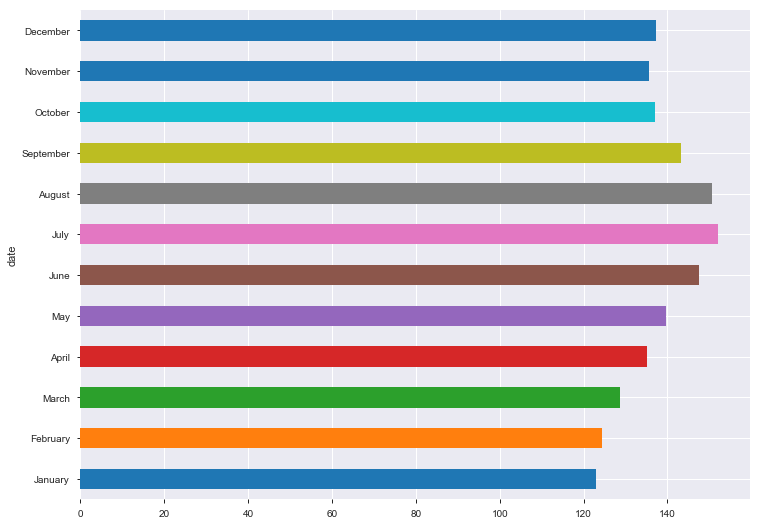

In [148]:
mean_month.plot(kind = 'barh',figsize=(12,9));

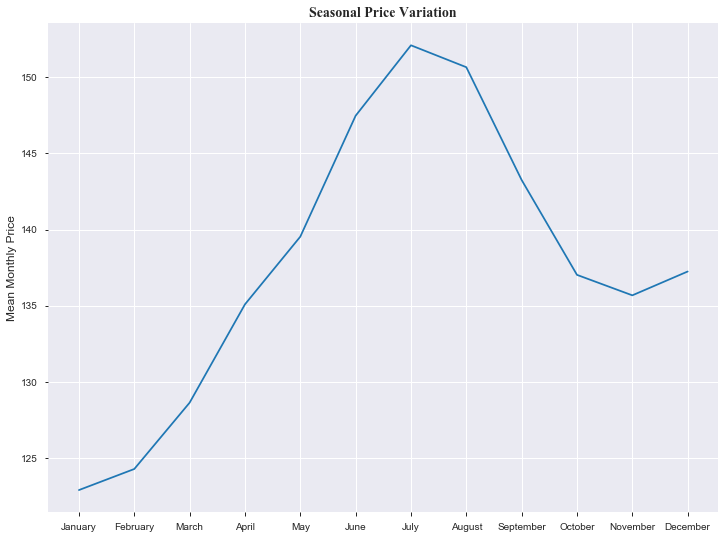

In [149]:
#Setting the figure size for visualizations 
plt.rcParams["figure.figsize"] = [12, 9] 
plt.plot(months, mean_month);
plt.ylabel("Mean Monthly Price",fontsize = 12);
plt.title('Seasonal Price Variation',fontsize = 14,
            fontname="Times New Roman",fontweight="bold");

<a id='p_insights'></a>
## Preliminary Insights
> 

<a id='method'></a>
# Methodology

>

<a id='model'></a>
## Model Selection

<a id='implementation'></a>
## Model Implementation

<a id='evaluation'></a>
## Evaluating Model Performance

<a id='results'></a>
# Results

<a id='discussion'></a>
## Discussion

>    


<a id='conclusion'></a>
## Conclusion

>

<a id='reference'></a>
# References
* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
* [BeautifulSoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [Web Scraping Wikipedia Tables using BeautifulSoup and Python](https://medium.com/analytics-vidhya/web-scraping-wiki-tables-using-beautifulsoup-and-python-6b9ea26d8722)